In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [6]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [7]:
df['Reviews'].str.isnumeric().sum()

10840

In [8]:
df[-df['Reviews'].str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [9]:
df_copy=df.copy()

In [10]:
df_copy=df_copy.drop(df_copy.index[10472])

In [11]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [12]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [14]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df_copy['Size'].isnull().sum()

0

In [16]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [18]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [19]:
df_copy.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size     Installs  Type Price Content Rating  \
0      159  19000.0      10,000+  Free     0       Everyone   
1      967  14000.0     500,000+  Free     0       Everyone   
2    87510      8.7   5,000,000+  Free     0       Everyone   
3   215644  25000.0  50,000,000+  Free     0           Teen   
4      967      2.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [20]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
sp_chars=['+',',','$']
cols_chng=['Installs','Price']
for items in cols_chng:
          for ch in sp_chars:
                    df_copy[items]=df_copy[items].str.replace(ch,'')

In [23]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [25]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [27]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [28]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['date']=df_copy['Last Updated'].dt.day

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  date            10840 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(7)
memor

In [30]:
df_copy.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   date  
0     7  
1    15  
2     1  
3     8  
4    20

In [31]:
df_copy.to_csv(r'D:\mca\jims\data science\ds udemy\eda\corrected datasets\playstore_corrected_set.csv')

#eda


In [32]:
df_copy

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000.0     10000  Free    0.0       Everyone   
1         3.9      967  14000.0    500000  Free    0.0       Everyone   
2         4.7    87510      8.7   5000000  Free    0.0       Everyone   
3         4.5   215644  25000.0  50000000  Free    0.0           Teen   
4         4.3      967      2.8    100000  Free    0.0       Everyone   
...       ...      ...      ...       ...   ...    ...            ...   
10836     4.5       38  53000.0      5000  Free    0.0       Everyone   
10837     5.0        4      3.6       100  Free    0.0       Everyone   
10838     NaN        3      9.5      1000  Free    0.0       Everyone   
10839     4.5      114      NaN      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000.0  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10838                    Medical   2017-01-20                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  date  
0            4.0.3 and up     7  
1            4.0.3 and up    15  
2            4.0.3 and up     1  
3              4.2 and up     8  
4              4.4 and up    20  
...                   ...   ...  
10836          4.1 and up    25  
10837          4.1 and up     6  
10838          2.2 and up    20  
10839  Varies with device    19  
10840  Varies with device    25  

[10840 rows x 14 columns]

In [33]:
df_copy[df_copy.duplicated("App")].shape

(1181, 14)

In [34]:
df_copy.drop_duplicates(subset='App',inplace=True)

In [35]:
df_copy[df_copy.duplicated("App")].shape

(0, 14)

In [36]:
df_copy.shape

(9659, 14)

In [37]:
num_feat=[feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
cat_feat=[feature for feature in df_copy.columns if df_copy[feature].dtype =='O']

print('we have {} num feat :{}'.format(len(num_feat),num_feat))
print('we have {} num feat :{}'.format(len(cat_feat),cat_feat))

we have 7 num feat :['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'date']
we have 7 num feat :['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [38]:
#prop of cate values in each col
for cols in cat_feat:
          print(df[cols].value_counts(normalize=True)*100)
          print('-------------------------------')

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
-------------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION  

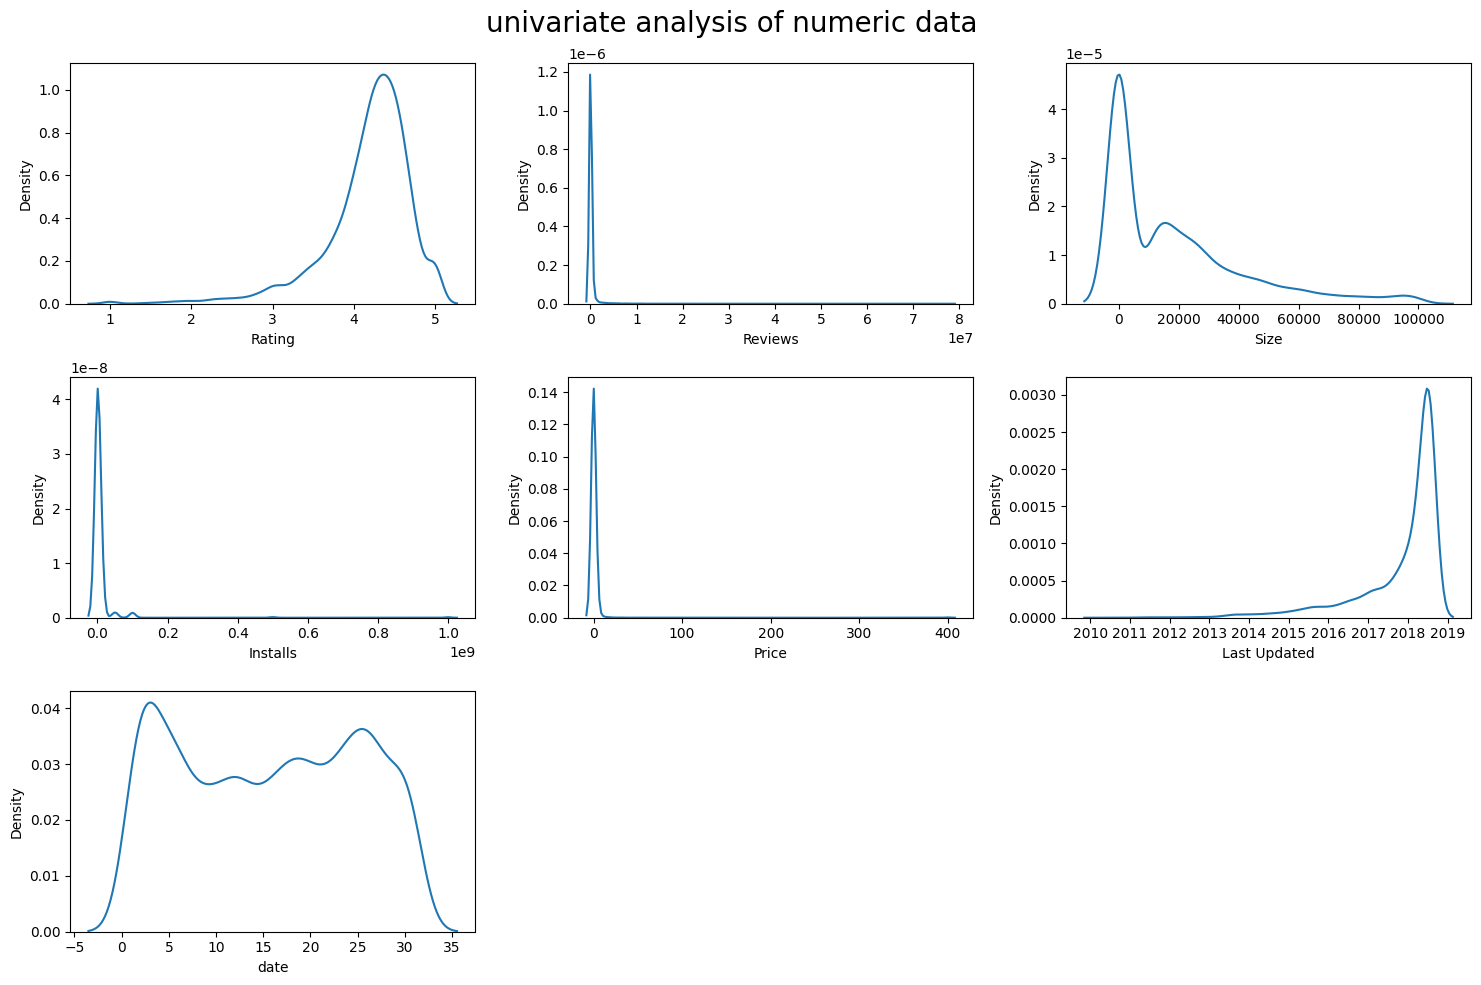

In [39]:
#prop of count data on numeric data 
plt.figure(figsize=(15,10))
plt.suptitle('univariate analysis of numeric data ',fontsize=20)

for i in range (0,len(num_feat)):
          plt.subplot(3,3,i+1)
          sns.kdeplot(x=df_copy[num_feat[i]])
          plt.xlabel(num_feat[i])
          plt.tight_layout()

# obs
-rating and yr are left skewed while reviews , size , installs and price are right skewed

C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\3487530818.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette='Set2')
C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\3487530818.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette='Set2')


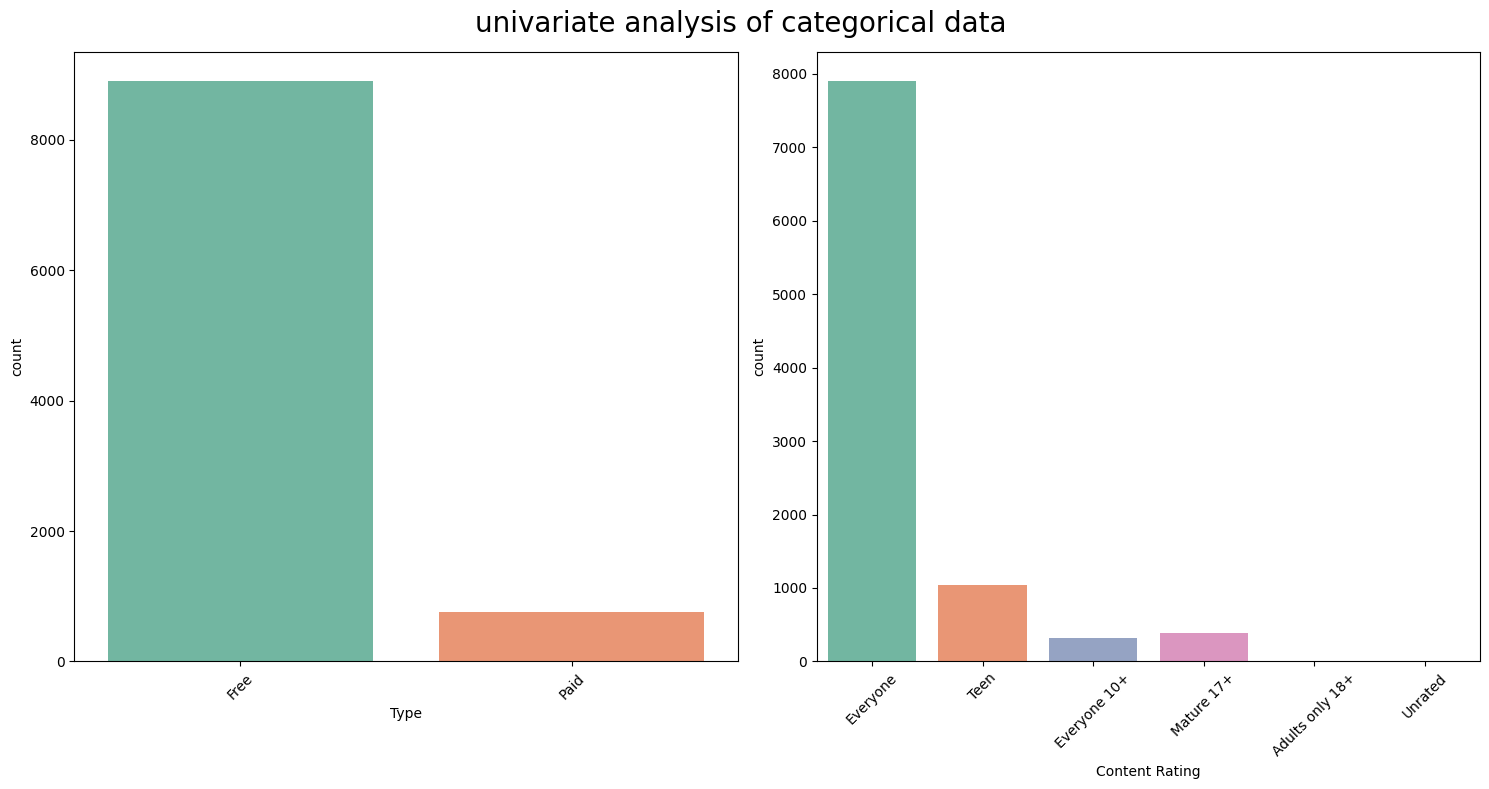

In [40]:
#categorical cols
plt.figure(figsize=(15,8))
plt.suptitle('univariate analysis of categorical data ',fontsize=20)
category=['Type','Content Rating']

for i in range (0,len(category)):
          plt.subplot(1,2,i+1)
          sns.countplot(x=df_copy[category[i]],palette='Set2')
          plt.xlabel(category[i])
          plt.xticks(rotation=45)

          plt.tight_layout()

<Axes: ylabel='count'>

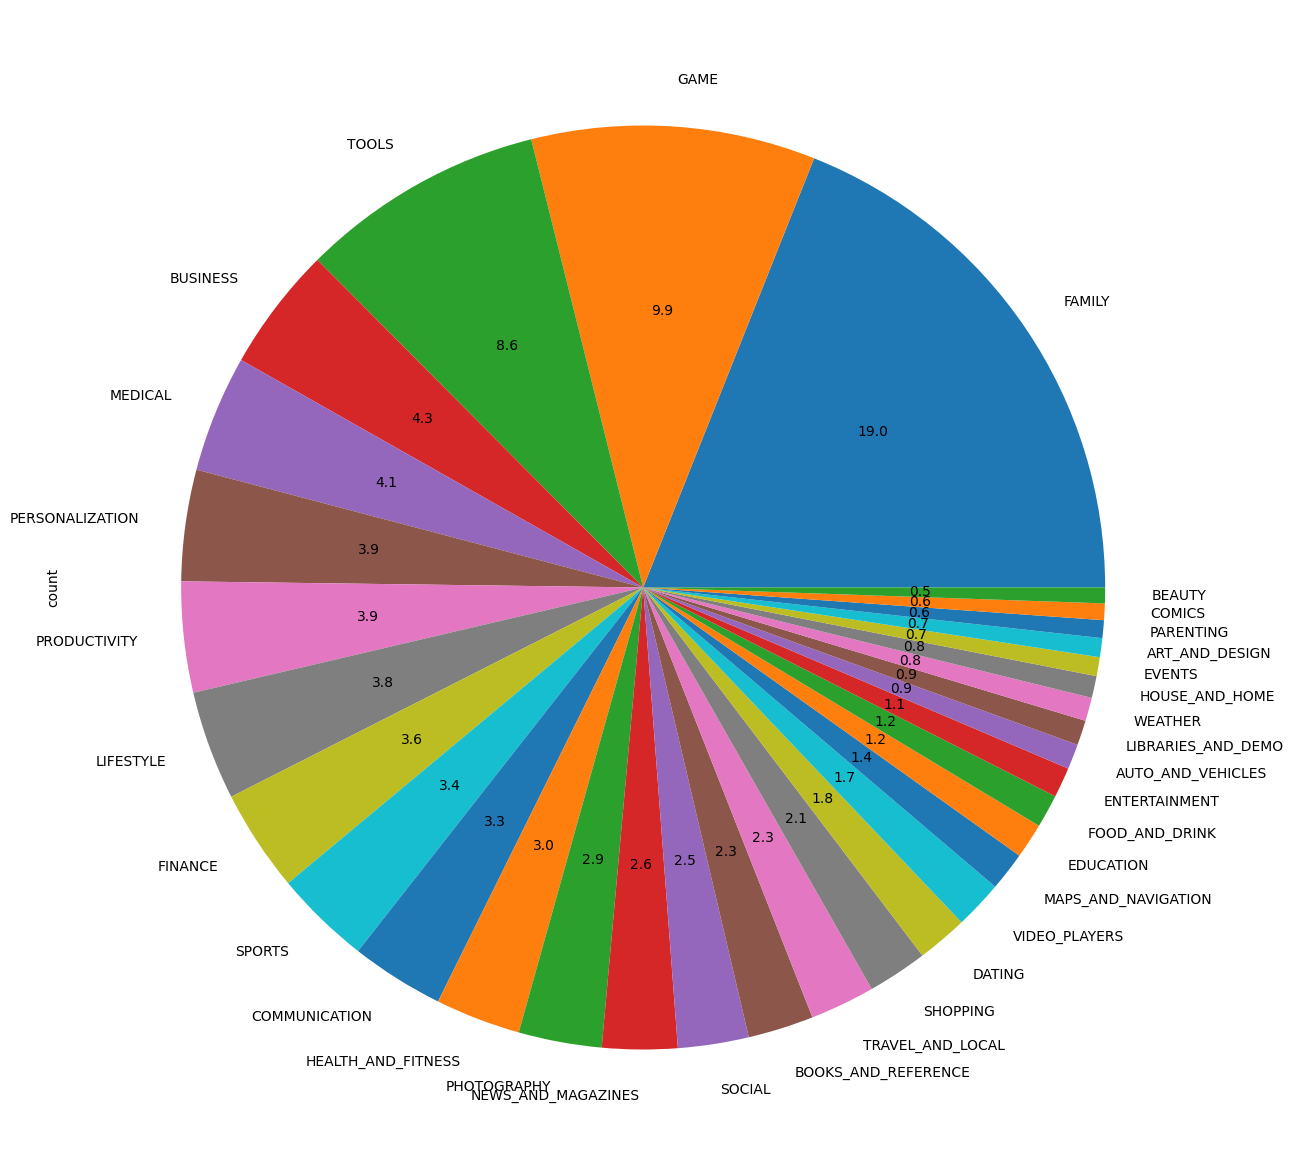

In [41]:
df_copy['Category'].value_counts().plot.pie(figsize=(15,15),autopct='%1.1f')

## observation
1. there are more of faily , tools and games apps in playstore 
2. beaty , comics, parenting aree very less in playstore

In [42]:
nums_cat=pd.DataFrame(df_copy['Category'].value_counts())
nums_cat.rename(columns={'categories':'count'},inplace=True)



In [43]:
nums_cat

count
Category                  
FAMILY                1832
GAME                   959
TOOLS                  827
BUSINESS               420
MEDICAL                395
PERSONALIZATION        376
PRODUCTIVITY           374
LIFESTYLE              369
FINANCE                345
SPORTS                 325
COMMUNICATION          315
HEALTH_AND_FITNESS     288
PHOTOGRAPHY            281
NEWS_AND_MAGAZINES     254
SOCIAL                 239
BOOKS_AND_REFERENCE    222
TRAVEL_AND_LOCAL       219
SHOPPING               202
DATING                 171
VIDEO_PLAYERS          163
MAPS_AND_NAVIGATION    131
EDUCATION              119
FOOD_AND_DRINK         112
ENTERTAINMENT          102
AUTO_AND_VEHICLES       85
LIBRARIES_AND_DEMO      84
WEATHER                 79
HOUSE_AND_HOME          74
EVENTS                  64
ART_AND_DESIGN          64
PARENTING               60
COMICS                  56
BEAUTY                  53

C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\2783777152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nums_cat.index[:10],y='count',data=nums_cat[:10],palette='hls')


<Axes: xlabel='Category', ylabel='count'>

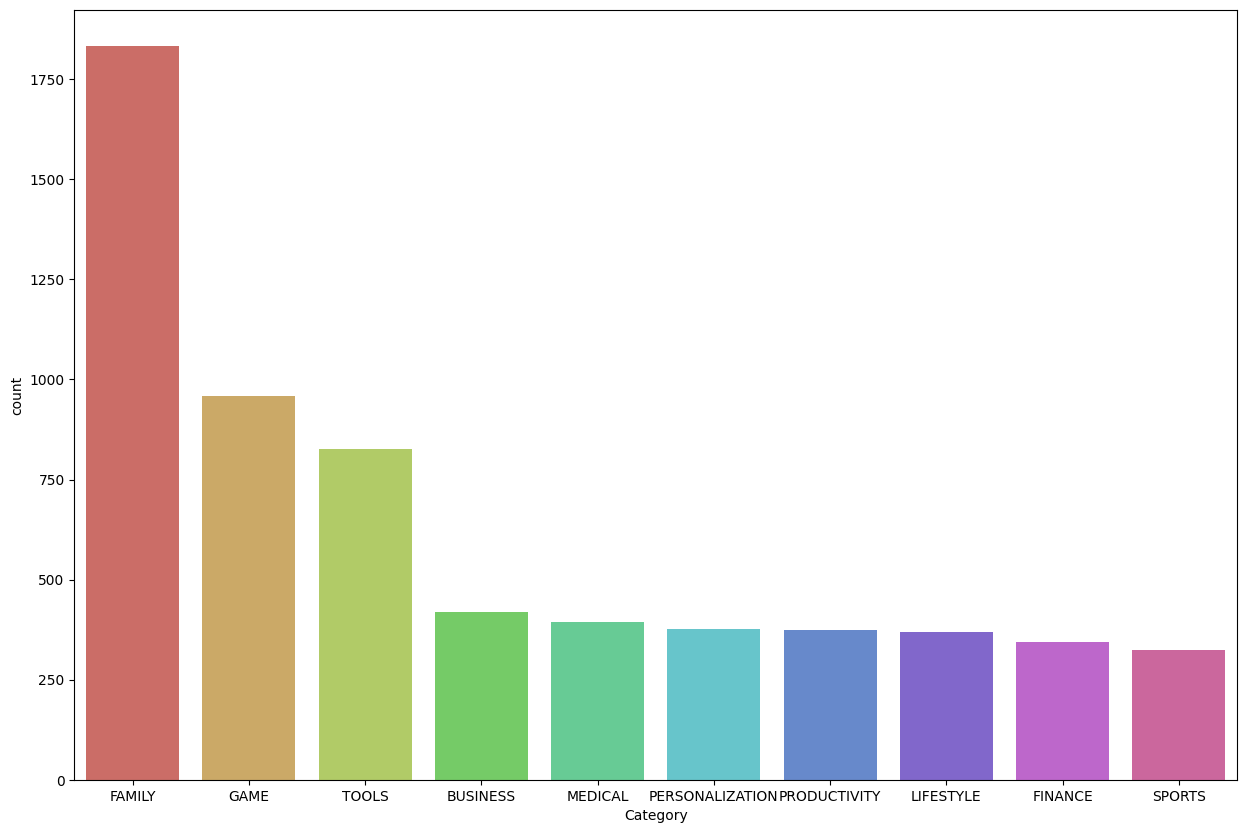

In [44]:
#top 10 apps
plt.figure(figsize=(15,10))
sns.barplot(x=nums_cat.index[:10],y='count',data=nums_cat[:10],palette='hls')

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [45]:
df_copy.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   date  
0     7  
1    15  
2     1  
3     8  
4    20

In [46]:
df_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
cat_install=df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)

In [48]:
cat_install_top10=pd.DataFrame(cat_install[:10])
cat_install_top10

Installs
Category                       
GAME                13878924415
COMMUNICATION       11038276251
TOOLS                8001771915
PRODUCTIVITY         5793091369
SOCIAL               5487867902
PHOTOGRAPHY          4649147655
FAMILY               4427941505
VIDEO_PLAYERS        3926902720
TRAVEL_AND_LOCAL     2894887146
NEWS_AND_MAGAZINES   2369217760

<Axes: xlabel='Installs', ylabel='Category'>

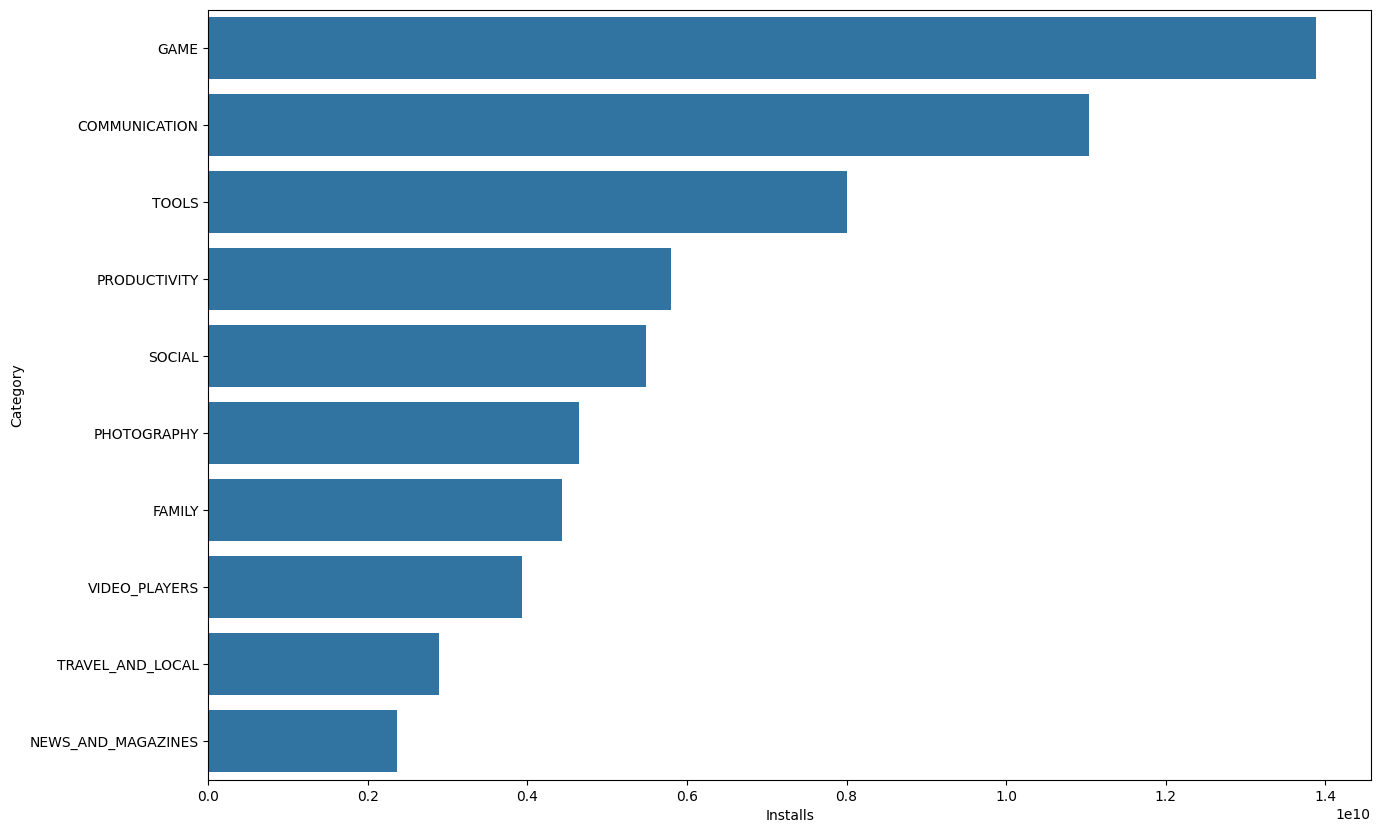

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(y='Category',x='Installs',data=cat_install_top10)

In [50]:
df_copy.head(1)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   

   Reviews     Size  Installs  Type  Price Content Rating        Genres  \
0      159  19000.0     10000  Free    0.0       Everyone  Art & Design   

  Last Updated Current Ver   Android Ver  date  
0   2018-01-07       1.0.0  4.0.3 and up     7

In [51]:
cat_install_topapps=pd.DataFrame(df_copy.groupby(['Category',"App"])['Installs'].sum().reset_index().sort_values('Installs',ascending=False))

In [52]:
cat_install_topapps.head()

Category                            App    Installs
9311    TRAVEL_AND_LOCAL             Google Street View  1000000000
6388  NEWS_AND_MAGAZINES                    Google News  1000000000
1145       COMMUNICATION  Skype - free IM & video calls  1000000000
9566       VIDEO_PLAYERS                        YouTube  1000000000
1181       COMMUNICATION             WhatsApp Messenger  1000000000

In [56]:
cat_install_top5apps=pd.DataFrame(cat_install_topapps.groupby('Category').head(5).reset_index().sort_values('Category'))
cat_install_top5apps.head(15)

index           Category  \
132     62     ART_AND_DESIGN   
136      9     ART_AND_DESIGN   
80      48     ART_AND_DESIGN   
131     55     ART_AND_DESIGN   
130     52     ART_AND_DESIGN   
133     69  AUTO_AND_VEHICLES   
135     70  AUTO_AND_VEHICLES   
142    140  AUTO_AND_VEHICLES   
143    100  AUTO_AND_VEHICLES   
145    134  AUTO_AND_VEHICLES   
161    191             BEAUTY   
160    189             BEAUTY   
137    156             BEAUTY   
159    186             BEAUTY   
141    159             BEAUTY   

                                                   App  Installs  
132                                       ibis Paint X  10000000  
136  Canva: Poster, banner, card maker & graphic de...  10000000  
80                               Sketch - Draw & Paint  50000000  
131                         Textgram - write on photos  10000000  
130                     Tattoo Name On My Photo Editor  10000000  
133      Android Auto - Maps, Media, Messaging & Voice  10000000  
135                      AutoScout24 - used car finder  10000000  
142                        Used cars for sale - Trovit   5000000  
143  Fines of the State Traffic Safety Inspectorate...   5000000  
145                                 Ulysse Speedometer   5000000  
161  Sephora: Skin Care, Beauty Makeup & Fragrance ...   1000000  
160                                      Selfie Camera   1000000  
137                      Beauty Camera - Selfie Camera  10000000  
159                                     Rainbow Camera   1000000  
141                       Best Hairstyles step by step   5000000

In [63]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int32         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int32         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  date            9659 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(7)
memory

In [64]:
# Group by 'Category' and sort by 'Installs'
top5_apps = df_copy.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

print(top5_apps)


                                                   App        Category  \
0                                Sketch - Draw & Paint  ART_AND_DESIGN   
1                       Tattoo Name On My Photo Editor  ART_AND_DESIGN   
2                                         ibis Paint X  ART_AND_DESIGN   
3                           Textgram - write on photos  ART_AND_DESIGN   
4    Canva: Poster, banner, card maker & graphic de...  ART_AND_DESIGN   
..                                                 ...             ...   
160  The Weather Channel: Rain Forecast & Storm Alerts         WEATHER   
161  AccuWeather: Daily Forecast & Live Weather Rep...         WEATHER   
162   GO Weather - Widget, Theme, Wallpaper, Efficient         WEATHER   
163                 Weather & Clock Widget for Android         WEATHER   
164    Weather by WeatherBug: Forecast, Radar & Alerts         WEATHER   

     Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0       4.5   215644  25000.0  50000000 

C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\3426456702.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_apps = df_copy.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)


In [72]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Group by 'Category' and get Top 5 apps in each category
# top5_apps = df.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Unique categories
categories = top5_apps['Category'].unique()

# Create subplots
plt.figure(figsize=(200,200))

# for i, category in enumerate(categories, 1):
#     plt.subplot(len(categories), 2, i)  # Creating subplot for each category
#     cat_data = top5_apps[top5_apps['Category'] == category]  # Filter data for current category
#     sns.barplot(data=cat_data, x='Installs', y='App', palette='viridis')
#     plt.title(f"Top 5 Apps in {category}")
#     plt.xlabel('Installs')
#     plt.ylabel('App')

# plt.tight_layout()
# plt.show()

for i, category in enumerate(top5_apps['Category'].unique(), 1):
    plt.subplot(len(top5_apps['Category'].unique()), 2, i)
    cat_data = top5_apps[top5_apps['Category'] == category]
    sns.barplot(data=cat_data, x='Installs', y='App', palette='viridis')
    plt.title(f"Top 5 Apps in {category}")
    plt.xlabel('Installs')
    plt.ylabel('App')

plt.tight_layout()
plt.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\708344718.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_data, x='Installs', y='App', palette='viridis')
C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\708344718.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_data, x='Installs', y='App', palette='viridis')
C:\Users\rudra\AppData\Local\Temp\ipykernel_21248\708344718.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_data, x='Installs', y='App', palette='viridis')
C:\Users\rudra\AppData\Local\Temp\ipy

In [54]:
# plt.figure(figsize=(200,200))
# for i in  enumerate(cat_install_top5apps['Category']):
#           # plt.subplot(4,2,i+1)
#           plt.subplot(11,3,i)
#           sns.barplot(x='Installs', y='App', hue='Category',data=cat_install_top5apps)

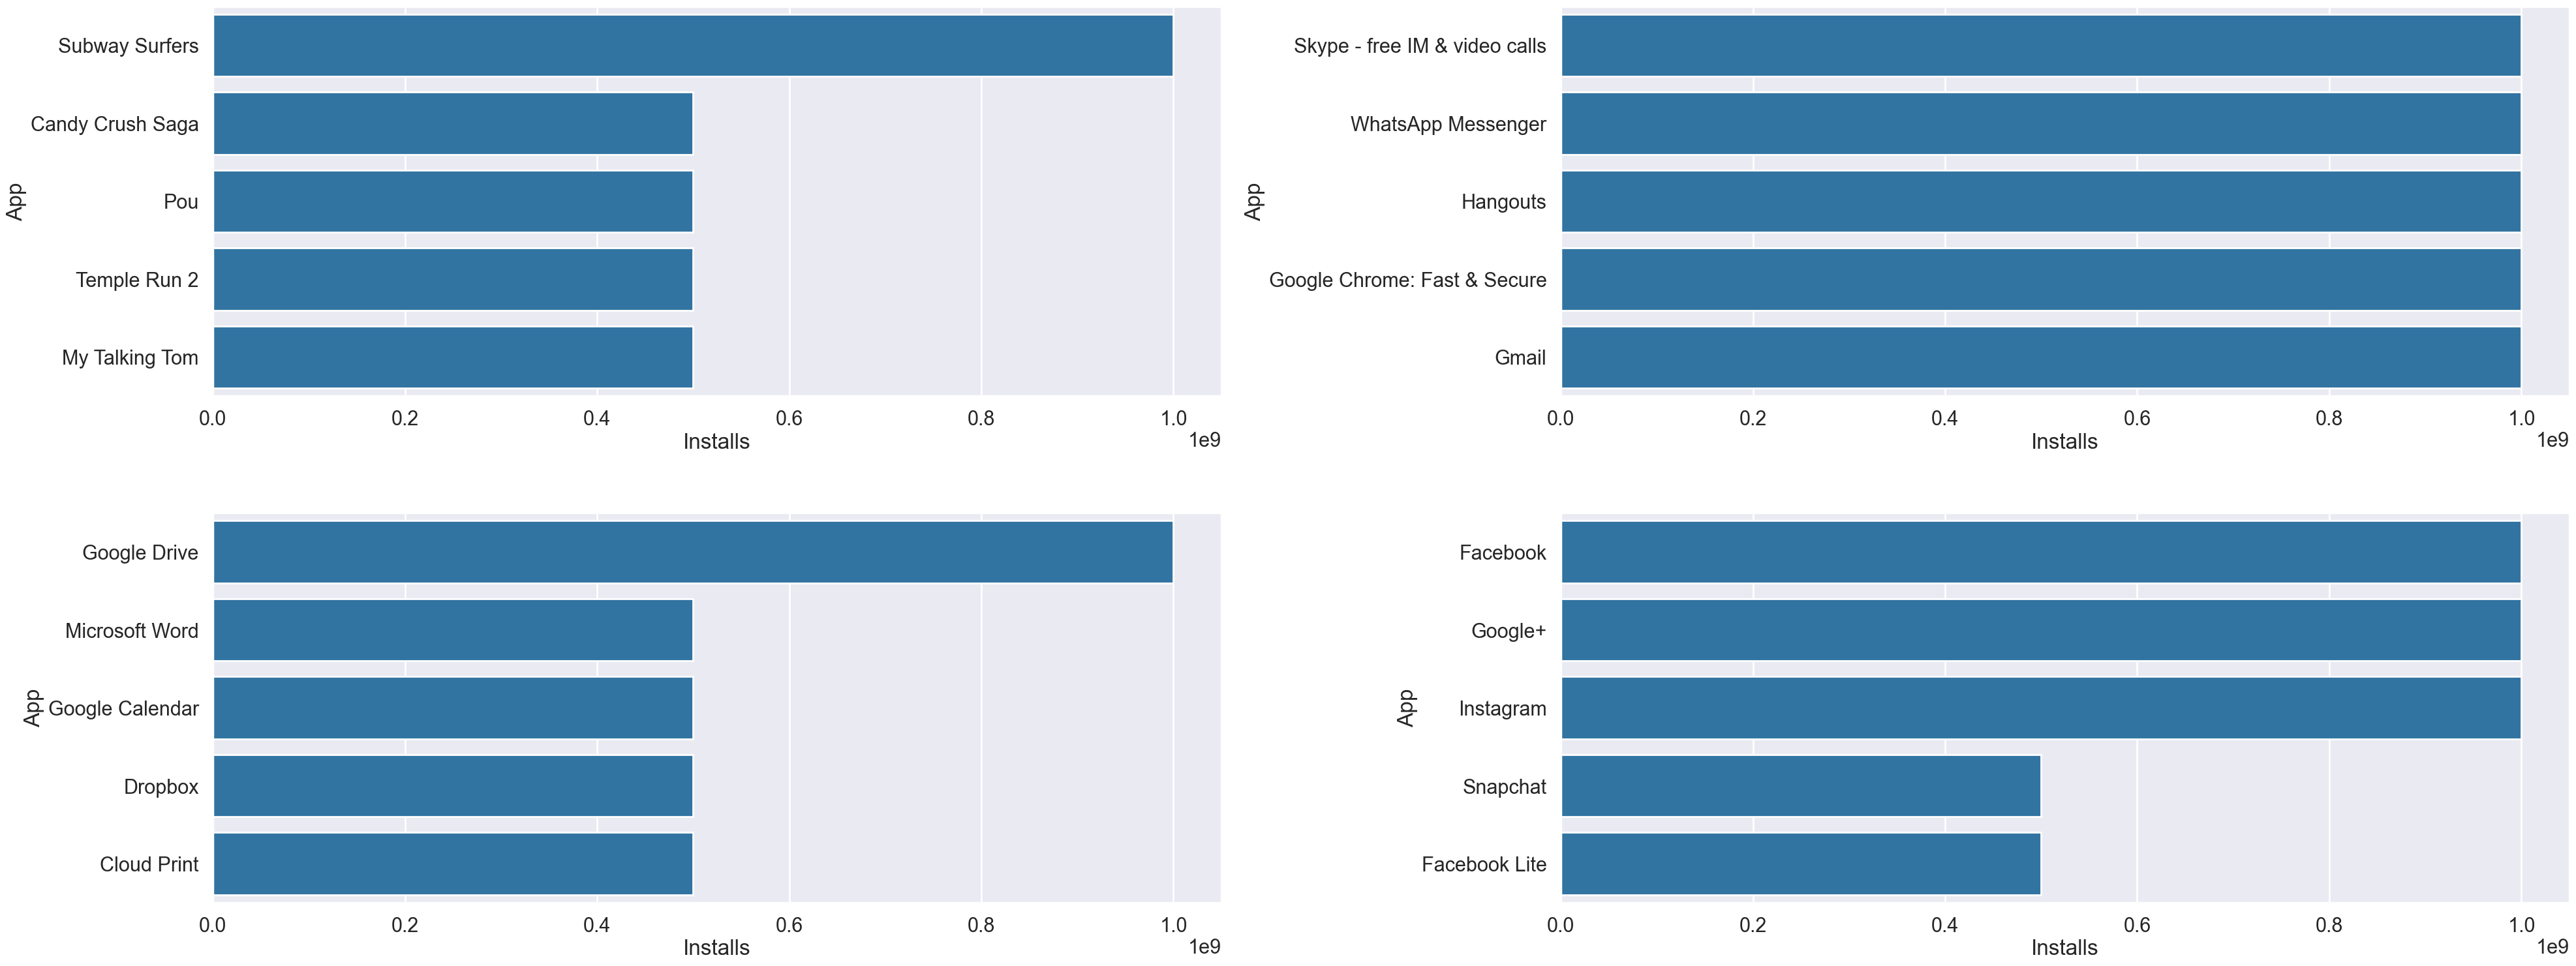

In [55]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index().sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))

for i,categ in enumerate(apps):
    df2 = dfa[dfa.Category == categ]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# apps with 5 star rating


In [73]:
df_copy.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   
5      167      5.6     50000  Free    0.0       Everyone   
6      178  19000.0     50000  Free    0.0       Everyone   
7    36815  29000.0   1000000  Free    0.0       Everyone   
8    13791  33000.0   1000000  Free    0.0       Everyone   
9      121      3.1     10000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   
5               Art & Design   2017-03-26                 1.0    2.3 and up   
6               Art & Design   2018-04-26                 1.1  4.0.3 and up   
7               Art & Design   2018-06-14            6.1.61.1    4.2 and up   
8               Art & Design   2017-09-20               2.9.2    3.0 and up   
9    Art & Design;Creativity   2018-07-03                 2.8  4.0.3 and up   

   date  
0     7  
1    15  
2     1  
3     8  
4    20  
5    26  
6    26  
7    14  
8    20  
9     3

In [75]:
star5_apps=df_copy[df_copy['Rating']==5]

In [76]:
star5_apps

App   Category  Rating  Reviews  \
329                  Hojiboy Tojiboyev Life Hacks     COMICS     5.0       15   
612                 American Girls Mobile Numbers     DATING     5.0        5   
615                                  Awake Dating     DATING     5.0        2   
633                         Spine- The dating app     DATING     5.0        5   
636    Girls Live Talk - Free Text and Video Chat     DATING     5.0        6   
...                                           ...        ...     ...      ...   
10721                           Mad Dash Fo' Cash       GAME     5.0       14   
10742                       GKPB FP Online Church  LIFESTYLE     5.0       32   
10776                            Monster Ride Pro       GAME     5.0        1   
10820                             Fr. Daoud Lamei     FAMILY     5.0       22   
10837            Fr. Mike Schmitz Audio Teachings     FAMILY     5.0        4   

          Size  Installs  Type  Price Content Rating     Genres Last Updated  \
329    37000.0      1000  Free    0.0       Everyone     Comics   2018-06-26   
612        4.4      1000  Free    0.0     Mature 17+     Dating   2018-07-17   
615    70000.0       100  Free    0.0     Mature 17+     Dating   2018-07-24   
633        9.3       500  Free    0.0           Teen     Dating   2018-07-14   
636        5.0       100  Free    0.0     Mature 17+     Dating   2018-08-01   
...        ...       ...   ...    ...            ...        ...          ...   
10721  16000.0       100  Free    0.0       Everyone     Arcade   2017-06-19   
10742      7.9      1000  Free    0.0       Everyone  Lifestyle   2017-12-31   
10776  24000.0        10  Free    0.0       Everyone     Racing   2018-03-05   
10820      8.6      1000  Free    0.0           Teen  Education   2018-06-27   
10837      3.6       100  Free    0.0       Everyone  Education   2018-07-06   

      Current Ver   Android Ver  date  
329           2.0  4.0.3 and up    26  
612           3.0  4.0.3 and up    17  
615         2.2.9    4.4 and up    24  
633           4.0  4.0.3 and up    14  
636           8.2  4.0.3 and up     1  
...           ...           ...   ...  
10721        2.5a    4.1 and up    19  
10742       0.7.1    4.4 and up    31  
10776         2.0    2.3 and up     5  
10820       3.8.0    4.1 and up    27  
10837         1.0    4.1 and up     6  

[271 rows x 14 columns]

In [79]:
print('5 star apps are :',star5_apps.shape[0])

5 star apps are : 271
